1979


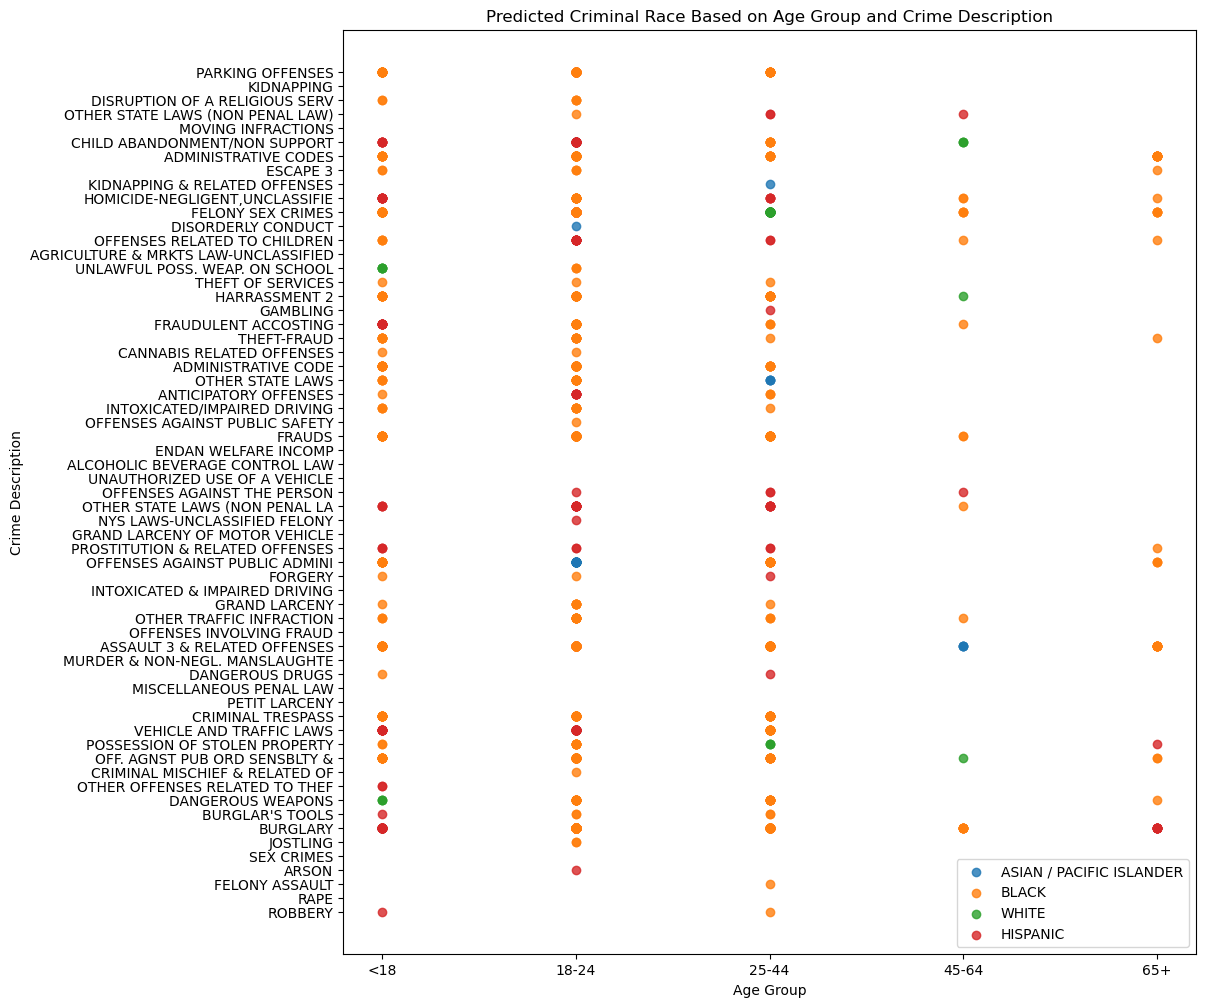

C:\Users\sydne\AppData\Local\Temp\ipykernel_19324\4182295312.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Confusion Matrix:
[[    0     0  1073]
 [    0     0     0]
 [    0 21348     0]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00    1073.0
           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00   21348.0

    accuracy                           0.00   22421.0
   macro avg       0.00      0.00      0.00   22421.0
weighted avg       0.00      0.00      0.00   22421.0



c:\Users\sydne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sydne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sydne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sydne\anaconda3\Lib\site-packages\sklearn\metrics\_cla

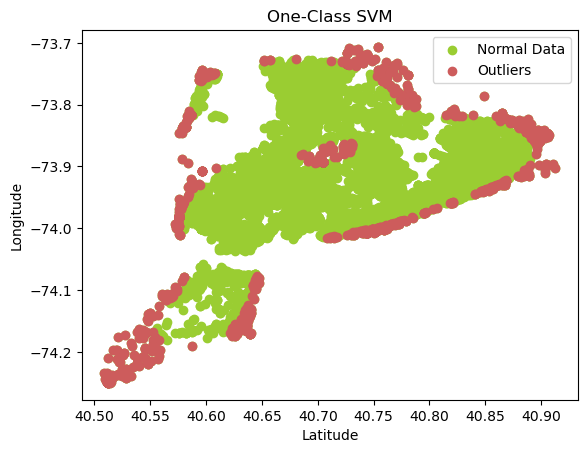

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report
def sklearn_KNN(X_train,X_test,Y_train,k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    return predictions


#KNN to classify missing race values
#Read data
data = pd.read_csv('cleaneddata.csv')
unknownRace = data.loc[data['PERP_RACE'] == 'UNKNOWN'].dropna()
knownRace = data.loc[data['PERP_RACE'] != 'UNKNOWN'].dropna()
X_test = unknownRace[['AGE_GROUP','OFNS_DESC']].to_numpy()
X_train = knownRace[['AGE_GROUP','OFNS_DESC']].to_numpy()
Y_train = knownRace['PERP_RACE'].to_numpy()
k = 5
print(len(X_test))

# Label encoding for Age Group and Crime Description
age_group_encoder = LabelEncoder()
ofns_desc_encoder = LabelEncoder()
#Encodes labels of column 0 and 1 (age group and crime description)
X_train[:, 0] = age_group_encoder.fit_transform(X_train[:, 0])
X_test[:, 0] = age_group_encoder.transform(X_test[:, 0])
X_train[:, 1] = ofns_desc_encoder.fit_transform(X_train[:, 1])
X_test[:, 1] = ofns_desc_encoder.transform(X_test[:, 1])

# Predict criminal race using KNN
predictions = sklearn_KNN(X_train, X_test, Y_train, k)

#Declare plot size and dictionary for x and y axis
plt.figure(figsize=(11, 12))
crime_desc_labels = {}
for desc in enumerate(knownRace['OFNS_DESC'].unique()):
    crime_desc_labels[desc[0]] = desc[1]
age_group_labels = {
    0: '<18',
    1: '18-24',
    2: '25-44',
    3: '45-64',
    4: '65+'
}
#Create scatter plot with different colors for each race
for label in set(predictions):
    mask = predictions == label
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=label, alpha=0.8)

# Get labels for x and y
plt.xticks(range(5), [age_group_labels[i] for i in range(5)])
plt.yticks(range(len(crime_desc_labels)), [crime_desc_labels[i] for i in range(len(crime_desc_labels))])
# Add labels and legend
plt.xlabel('Age Group')
plt.ylabel('Crime Description')
plt.title('Predicted Criminal Race Based on Age Group and Crime Description')
plt.legend(loc='best')

# Show the plot
plt.show()

# One-Class SVM to calculate outliers

#Selecting only features we need (lat and long)

X = data[['Latitude','Longitude']]
X.dropna(inplace=True)
X = X[(X['Latitude'] != 0) & (X['Longitude'] != 0)]


X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = OneClassSVM(nu=0.05)  # You can adjust the 'nu' parameter based on your dataset
model.fit(X_train_scaled)
predictions = model.predict(X_test_scaled)

# Evaluating the model
conf_matrix = confusion_matrix(predictions, [1 if x == -1 else 0 for x in predictions])
print("Confusion Matrix:")
print(conf_matrix)

report = classification_report(predictions, [1 if x == -1 else 0 for x in predictions])
print("Classification Report:")
print(report)

plt.scatter(X_test['Latitude'], X_test['Longitude'], c='yellowgreen', label='Normal Data')

# Identify the outliers predicted by the One-Class SVM (-1 indicates an outlier)
outliers = X_test[predictions == -1]
plt.scatter(outliers['Latitude'], outliers['Longitude'], c='indianred', label='Outliers')

plt.title('One-Class SVM')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()


